In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
train_data=pd.read_csv("C:/Users/hp/Documents/Machine Learning/Project/Project Files/heart.csv")

In [16]:
train_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [17]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
train_data.shape

(1025, 14)

In [20]:
#checking for duplicate values
train_data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [21]:
#checking for missing values
train_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [22]:
#finding outliers
X=train_data.drop(["target"],axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [23]:
df_replace_nan = X.mask(X.sub(X.mean()).div(X.std()).abs().gt(3))

df_replace_nan.isnull().sum().sum() 

56

In [24]:
df_replace_median = df_replace_nan.fillna(df_replace_nan.median())

df_replace_median.isnull().sum().sum() 

0

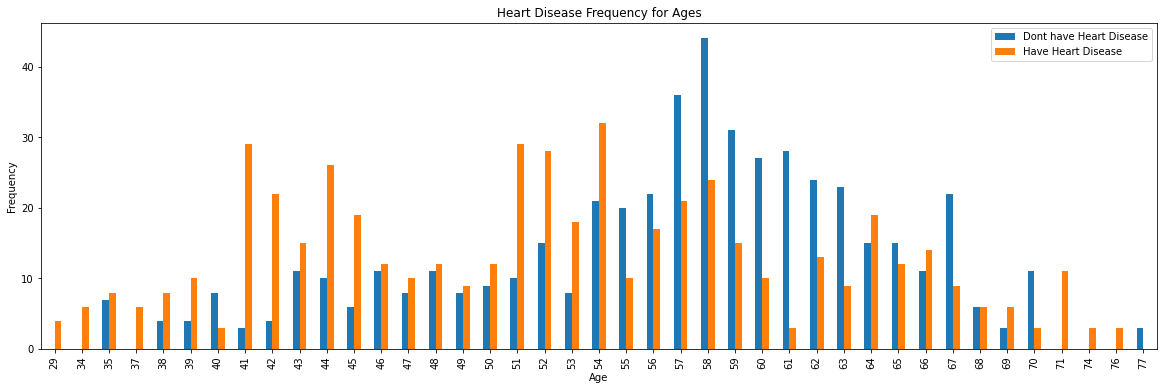

In [25]:
pd.crosstab(train_data.age,train_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

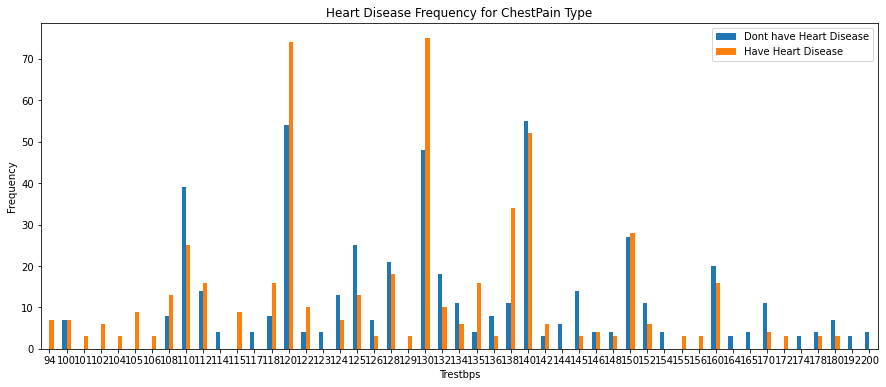

In [26]:
pd.crosstab(train_data.trestbps,train_data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for ChestPain Type')
plt.xlabel('Trestbps')
plt.xticks(rotation=0)
plt.legend(["Dont have Heart Disease", "Have Heart Disease"])
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndtrestbps.png')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data.loc[:, train_data.columns != 'target'], train_data['target'], 
                 test_size = 0.2, random_state=66)

Decision Tree accuracy for training dataset: 0.8426829268292683
Decision Tree accuracy for testing dataset: 0.8292682926829268


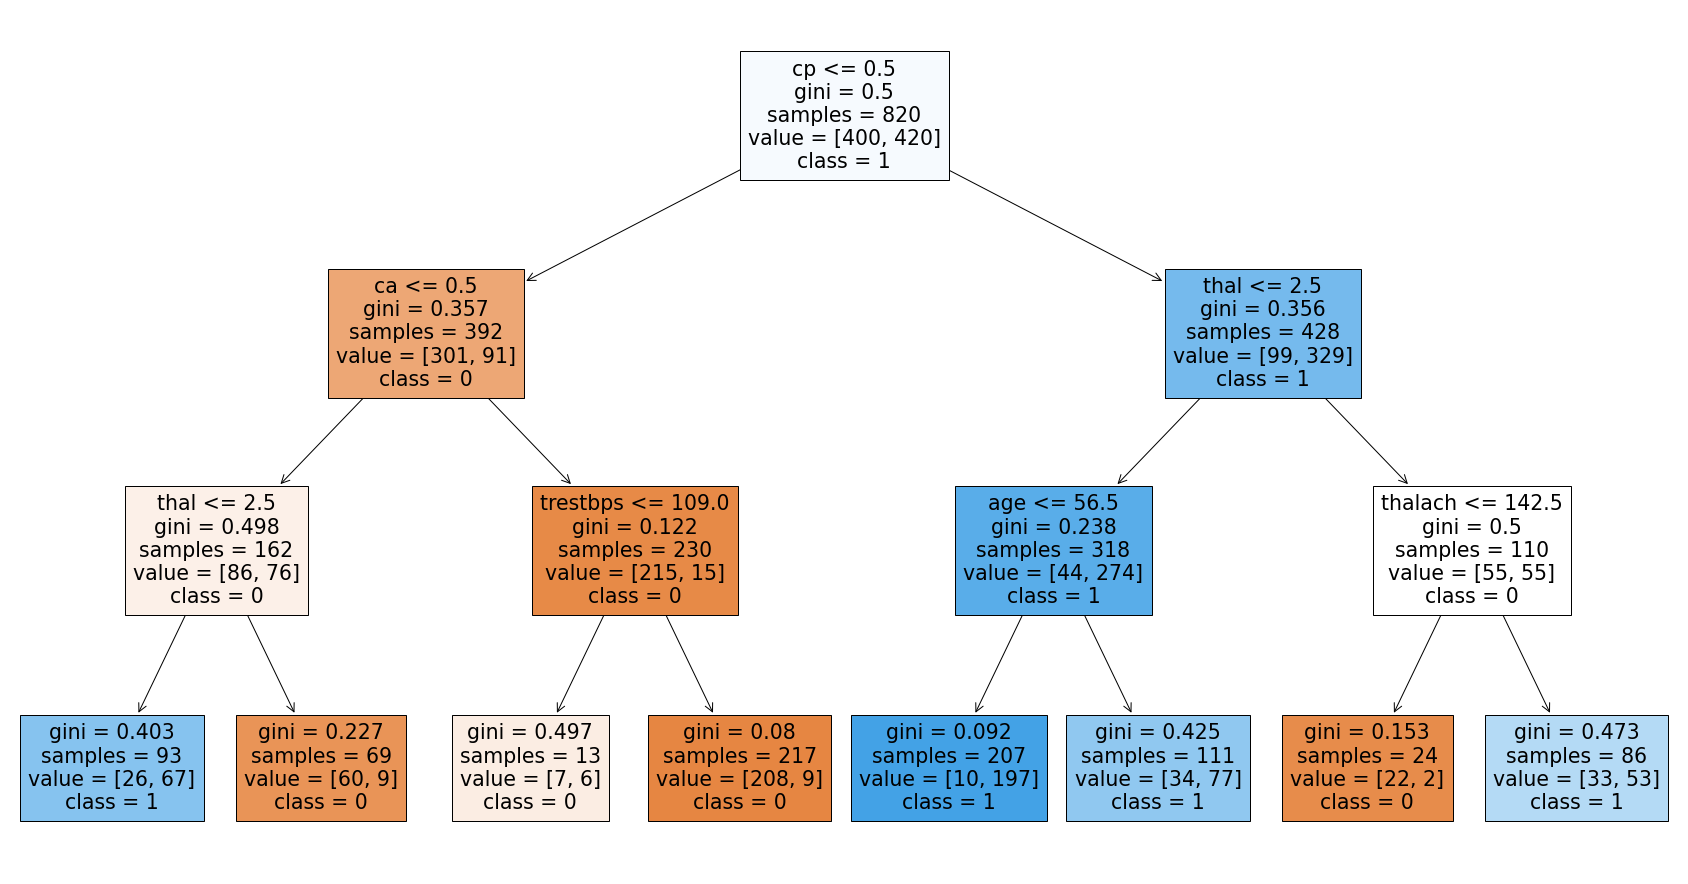

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
InputFeatures = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
train_df = train_data[InputFeatures]

clf = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)
clf.fit(x_train, y_train)

fig = plt.figure(figsize=(30,16))
decisiontree = tree.plot_tree(clf, 
                   feature_names=InputFeatures,  
                   class_names=['0', '1'],
                   filled=True)

print("Decision Tree accuracy for training dataset: {}".format(clf.score(x_train, y_train)))
print("Decision Tree accuracy for testing dataset: {}".format(clf.score(x_test, y_test)))